Dataset from National Institute of Diabetes and Digestive and Kidney Diseases.

The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

Here I have a done a Univariate analysis and Pregnency Data(Can be done with all the parameters available) and a multivariate analysis of pregnancy with outcome(To check correlation in between them). 

---

In [2]:
!pip install seaborn

     -------------------------------------- 293.3/293.3 kB 2.0 MB/s eta 0:00:00



[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
# for data wrangling
import numpy as np
import pandas as pd

# for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB




From above results and also from the offical data description we can notice that Outcome: Whether patient has Diabetes? (0 for No, 1 for Yes)

---



In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


### Things to Observe


The features "Glucose," "Blood Pressure," "Skin Thickness," "Insulin," and "BMI" all have a minimum value of 0. This is not logical because these values can't be zero. This can be missing data 


---



In [8]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

## **EDA**
In this section, we will visualize the features of the dataset.

### Univariate Analysis of pregnancies

#### Analysis of Pregnancies


<AxesSubplot:xlabel='Pregnancies'>

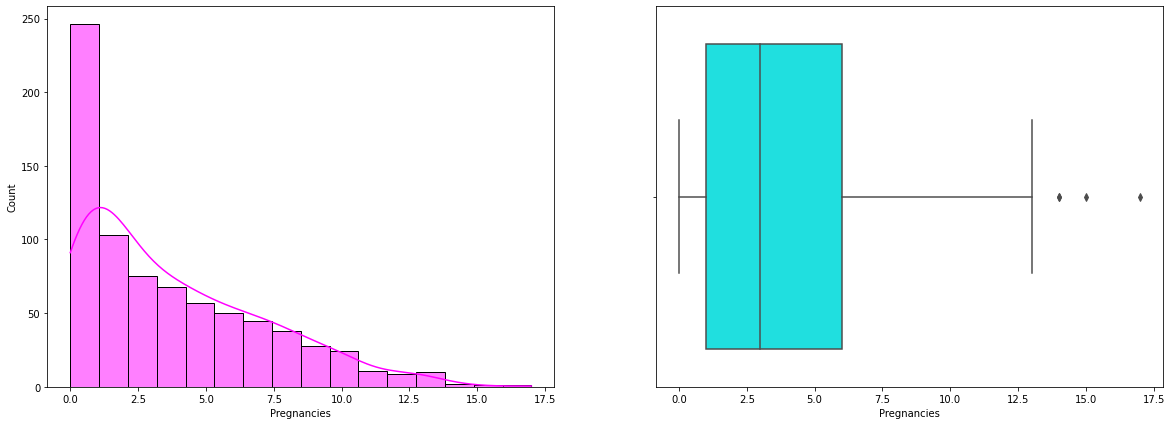

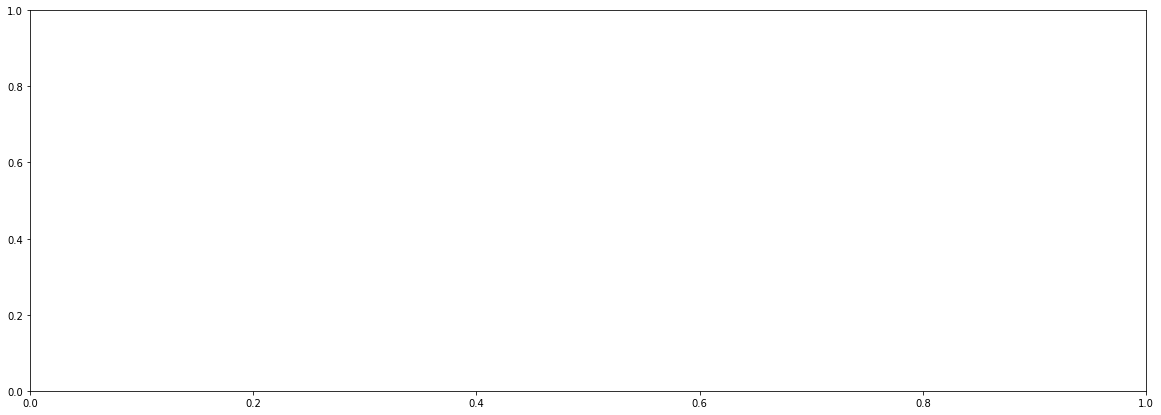

In [35]:
fig1, ax1 = plt.subplots(1, 2, figsize=(20, 7))
fig2, ax2 = plt.subplots(figsize=(20, 7))

sns.histplot(data=df, x="Pregnancies", kde=True, ax=ax1[0],color = 'magenta')
#for outliers
sns.boxplot(data=df, x="Pregnancies", ax=ax1[1],color = 'aqua')

In [10]:
print("Median of Pregnancies: ", df["Pregnancies"].median())
print("Maximum of Pregnancies: ", df["Pregnancies"].max())

Median of Pregnancies:  3.0
Maximum of Pregnancies:  17


In [11]:
df["Pregnancies"].value_counts()

1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: Pregnancies, dtype: int64

From the above analysis we observe that:

- Most patients had 0, 1 or 2 pregnancies.
- Median value is 3
- Also,a patient had 17 pregnancies: Max value

There are 3 outliers on the boxplot.

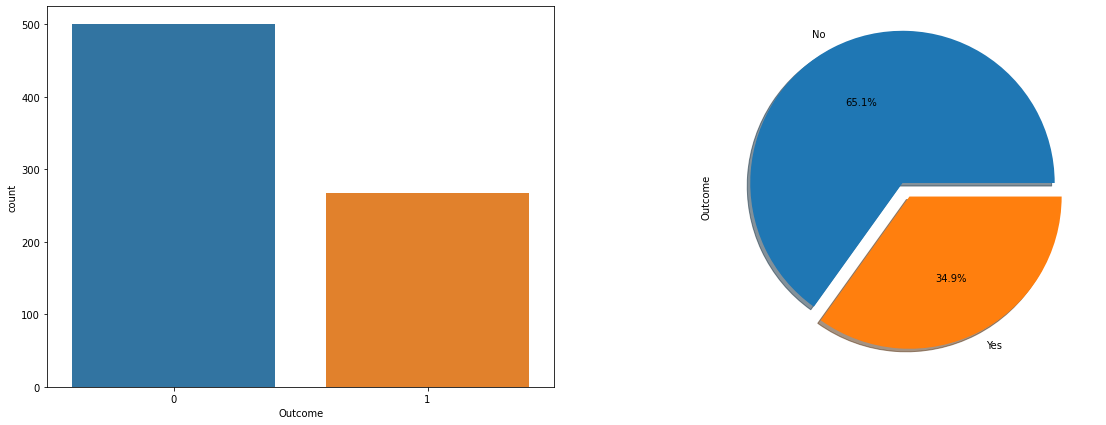

In [48]:
fig, ax = plt.subplots(1, 2, figsize=(20, 7))

sns.countplot(data=df, x="Outcome", ax=ax[0])
df["Outcome"].value_counts().plot.pie(explode=[0.1, 0],autopct="%1.1f%%", labels=["No", "Yes"], shadow=True, ax=ax[1])
plt.close(2)
plt.show()


- **65.1% patients in the dataset do NOT have diabetes.**
- **34.9% patients in the dataset has diabetes.**

### Multivariate Analysis

#### Analysis of Pregnancies and Outcome

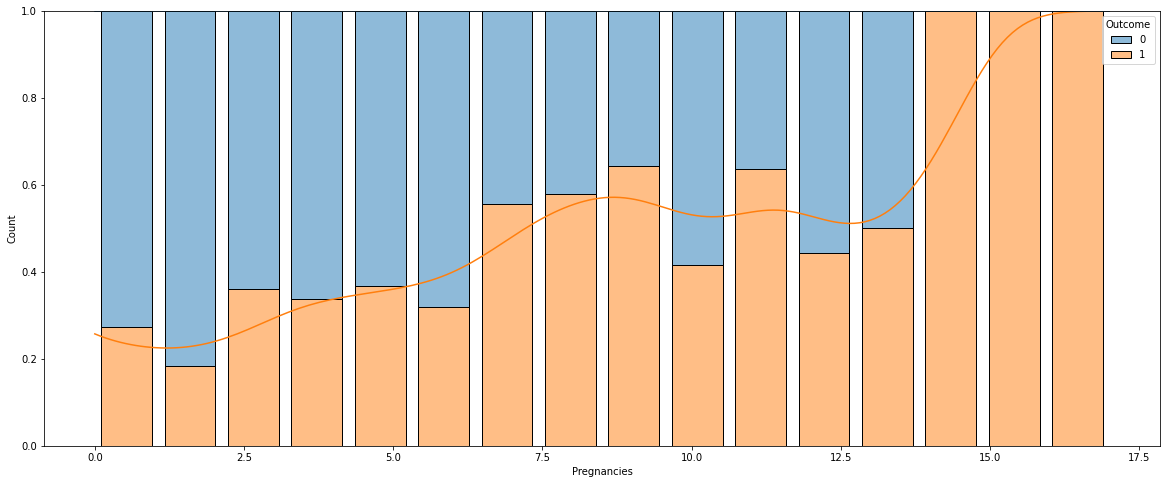

In [49]:
fig19, ax19 = plt.subplots(figsize=(20, 8))

sns.histplot(data=df, x="Pregnancies", hue="Outcome", shrink=0.8, multiple="fill", kde=True, ax=ax19)
plt.show()

There is some positive linear correlation of Pregnancies with Outcomes.

## Fill missing Values 
We can replace the 0-values of the following columns with their median values:

*   Glucose
*   BloodPressure
*   SkinThickness
*   Insulin
*   BMI

## Further Work  
Now, we have some valuable insights, which are helpful for us to create a machine learning model. So if someone wants to go further with this data, He/She can create do feature scaling and all to create a classification model. 